In [ ]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
import pandas as pd 
import sklearn as skl
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import sklearn.kernel_ridge
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive

# the following command loads up your google drive. It will promp you to give Colab access to your Gdrive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## Change it to house data name
path_to_train = '/content/drive/My Drive/AMATH 582/HW 4/house-votes-84.data'
data_ori =  pd.read_csv(path_to_train, sep=",",header=None)
print(data_ori)
data_ori_shape = data_ori.shape
print(data_ori_shape)

             0  1  2  3  4  5  6  7  8  9  10 11 12 13 14 15 16
0    republican  n  y  n  y  y  y  n  n  n  y  ?  y  y  y  n  y
1    republican  n  y  n  y  y  y  n  n  n  n  n  y  y  y  n  ?
2      democrat  ?  y  y  ?  y  y  n  n  n  n  y  n  y  y  n  n
3      democrat  n  y  y  n  ?  y  n  n  n  n  y  n  y  n  n  y
4      democrat  y  y  y  n  y  y  n  n  n  n  y  ?  y  y  y  y
..          ... .. .. .. .. .. .. .. .. .. .. .. .. .. .. .. ..
430  republican  n  n  y  y  y  y  n  n  y  y  n  y  y  y  n  y
431    democrat  n  n  y  n  n  n  y  y  y  y  n  n  n  n  n  y
432  republican  n  ?  n  y  y  y  n  n  n  n  y  y  y  y  n  y
433  republican  n  n  n  y  y  y  ?  ?  ?  ?  n  y  y  y  n  y
434  republican  n  y  n  y  y  y  n  n  n  y  n  y  y  y  ?  n

[435 rows x 17 columns]
(435, 17)


In [ ]:
print([*range(1,18)])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]


In [ ]:
data_modif = data_ori.copy()
for i in range(1,17):
  for j in range(435):
    if data_modif.iloc[j][i] == 'n':
      data_modif.iloc[j][i]= -1
    elif data_modif.iloc[j][i] == 'y':
      data_modif.iloc[j][i]= 1
    else:
      data_modif.iloc[j][i]= 0

In [ ]:
print(data_modif)

             0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  \
0    republican  -1   1  -1   1   1   1  -1  -1  -1   1   0   1   1   1  -1   
1    republican  -1   1  -1   1   1   1  -1  -1  -1  -1  -1   1   1   1  -1   
2      democrat   0   1   1   0   1   1  -1  -1  -1  -1   1  -1   1   1  -1   
3      democrat  -1   1   1  -1   0   1  -1  -1  -1  -1   1  -1   1  -1  -1   
4      democrat   1   1   1  -1   1   1  -1  -1  -1  -1   1   0   1   1   1   
..          ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..   
430  republican  -1  -1   1   1   1   1  -1  -1   1   1  -1   1   1   1  -1   
431    democrat  -1  -1   1  -1  -1  -1   1   1   1   1  -1  -1  -1  -1  -1   
432  republican  -1   0  -1   1   1   1  -1  -1  -1  -1   1   1   1   1  -1   
433  republican  -1  -1  -1   1   1   1   0   0   0   0  -1   1   1   1  -1   
434  republican  -1   1  -1   1   1   1  -1  -1  -1   1  -1   1   1   1   0   

     16  
0     1  
1     0  
2    -1  
3     1  
4

In [ ]:
democrats = pd.DataFrame()
republicans = pd.DataFrame()
for i in range(435):
  if data_modif.iloc[i][0] == 'democrat':
    democrats = democrats.append(data_modif.iloc[i])
  else:
    republicans = republicans.append(data_modif.iloc[i])

In [ ]:
print(republicans)

             0    1    2    3    4    5    6    7    8    9    10   11   12  \
0    republican -1.0  1.0 -1.0  1.0  1.0  1.0 -1.0 -1.0 -1.0  1.0  0.0  1.0   
1    republican -1.0  1.0 -1.0  1.0  1.0  1.0 -1.0 -1.0 -1.0 -1.0 -1.0  1.0   
7    republican -1.0  1.0 -1.0  1.0  1.0  1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0   
8    republican -1.0  1.0 -1.0  1.0  1.0  1.0 -1.0 -1.0 -1.0 -1.0 -1.0  1.0   
10   republican -1.0  1.0 -1.0  1.0  1.0 -1.0 -1.0 -1.0 -1.0 -1.0  0.0  0.0   
..          ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
427  republican -1.0 -1.0 -1.0  1.0  1.0  1.0  1.0  1.0 -1.0  1.0 -1.0  1.0   
430  republican -1.0 -1.0  1.0  1.0  1.0  1.0 -1.0 -1.0  1.0  1.0 -1.0  1.0   
432  republican -1.0  0.0 -1.0  1.0  1.0  1.0 -1.0 -1.0 -1.0 -1.0  1.0  1.0   
433  republican -1.0 -1.0 -1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0 -1.0  1.0   
434  republican -1.0  1.0 -1.0  1.0  1.0  1.0 -1.0 -1.0 -1.0  1.0 -1.0  1.0   

      13   14   15   16  
0    1.0  1.0 -1.0  1.0  

In [ ]:
print(democrats)

           0    1    2    3    4    5    6    7    8    9    10   11   12  \
2    democrat  0.0  1.0  1.0  0.0  1.0  1.0 -1.0 -1.0 -1.0 -1.0  1.0 -1.0   
3    democrat -1.0  1.0  1.0 -1.0  0.0  1.0 -1.0 -1.0 -1.0 -1.0  1.0 -1.0   
4    democrat  1.0  1.0  1.0 -1.0  1.0  1.0 -1.0 -1.0 -1.0 -1.0  1.0  0.0   
5    democrat -1.0  1.0  1.0 -1.0  1.0  1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0   
6    democrat -1.0  1.0 -1.0  1.0  1.0  1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0   
..        ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
425  democrat -1.0 -1.0  1.0 -1.0 -1.0 -1.0  1.0  1.0 -1.0  1.0  1.0 -1.0   
426  democrat  1.0 -1.0  1.0 -1.0 -1.0 -1.0  1.0  1.0  1.0  1.0 -1.0 -1.0   
428  democrat  0.0  0.0  0.0 -1.0 -1.0 -1.0  1.0  1.0  1.0  1.0 -1.0 -1.0   
429  democrat  1.0 -1.0  1.0 -1.0  0.0 -1.0  1.0  1.0  1.0  1.0 -1.0  1.0   
431  democrat -1.0 -1.0  1.0 -1.0 -1.0 -1.0  1.0  1.0  1.0  1.0 -1.0 -1.0   

      13   14   15   16  
2    1.0  1.0 -1.0 -1.0  
3    1.0 -1.0 -1.0  1.0

In [ ]:
data_party_order = pd.concat([democrats,republicans], axis=0)
data_party_order.reset_index(inplace = True, drop = True)

In [ ]:
print(data_party_order)

             0    1    2    3    4    5    6    7    8    9    10   11   12  \
0      democrat  0.0  1.0  1.0  0.0  1.0  1.0 -1.0 -1.0 -1.0 -1.0  1.0 -1.0   
1      democrat -1.0  1.0  1.0 -1.0  0.0  1.0 -1.0 -1.0 -1.0 -1.0  1.0 -1.0   
2      democrat  1.0  1.0  1.0 -1.0  1.0  1.0 -1.0 -1.0 -1.0 -1.0  1.0  0.0   
3      democrat -1.0  1.0  1.0 -1.0  1.0  1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0   
4      democrat -1.0  1.0 -1.0  1.0  1.0  1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0   
..          ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
430  republican -1.0 -1.0 -1.0  1.0  1.0  1.0  1.0  1.0 -1.0  1.0 -1.0  1.0   
431  republican -1.0 -1.0  1.0  1.0  1.0  1.0 -1.0 -1.0  1.0  1.0 -1.0  1.0   
432  republican -1.0  0.0 -1.0  1.0  1.0  1.0 -1.0 -1.0 -1.0 -1.0  1.0  1.0   
433  republican -1.0 -1.0 -1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0 -1.0  1.0   
434  republican -1.0  1.0 -1.0  1.0  1.0  1.0 -1.0 -1.0 -1.0  1.0 -1.0  1.0   

      13   14   15   16  
0    1.0  1.0 -1.0 -1.0  

In [ ]:
y_data_party_order = []
for j in range(435):
  if data_party_order.iloc[j][0] =='democrat':
    y_data_party_order.append(1)
  else:
    y_data_party_order.append(-1)

In [ ]:
y_data_modif_ori = []
for j in range(435):
  if data_modif.iloc[j][0] =='democrat':
    y_data_modif_ori.append(1)
  else:
    y_data_modif_ori.append(-1)

In [ ]:
y_data_party_order = np.array([y_data_party_order])
y_data_party_order = np.transpose(y_data_party_order)


In [ ]:
print(y_data_party_order.shape)

(435, 1)


In [ ]:
y_data_modif_ori = np.array([y_data_modif_ori])
y_data_modif_ori = np.transpose(y_data_modif_ori)

In [ ]:
print(y_data_modif_ori.shape)

(435, 1)


In [ ]:
data_modif2 = data_modif.drop(data_modif.columns[0],axis=1)

In [ ]:
print(data_modif2)

     1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16
0    -1   1  -1   1   1   1  -1  -1  -1   1   0   1   1   1  -1   1
1    -1   1  -1   1   1   1  -1  -1  -1  -1  -1   1   1   1  -1   0
2     0   1   1   0   1   1  -1  -1  -1  -1   1  -1   1   1  -1  -1
3    -1   1   1  -1   0   1  -1  -1  -1  -1   1  -1   1  -1  -1   1
4     1   1   1  -1   1   1  -1  -1  -1  -1   1   0   1   1   1   1
..   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
430  -1  -1   1   1   1   1  -1  -1   1   1  -1   1   1   1  -1   1
431  -1  -1   1  -1  -1  -1   1   1   1   1  -1  -1  -1  -1  -1   1
432  -1   0  -1   1   1   1  -1  -1  -1  -1   1   1   1   1  -1   1
433  -1  -1  -1   1   1   1   0   0   0   0  -1   1   1   1  -1   1
434  -1   1  -1   1   1   1  -1  -1  -1   1  -1   1   1   1   0  -1

[435 rows x 16 columns]


In [ ]:
data_party_order2 = data_party_order.drop(data_party_order.columns[0],axis=1)

In [ ]:
X_data_ori = np.array(data_modif2)

In [ ]:
print(X_data_ori.shape)

(435, 16)


In [ ]:
X_data_party_order = np.array(data_party_order2)

In [ ]:
print(X_data_party_order)

[[ 0.  1.  1. ...  1. -1. -1.]
 [-1.  1.  1. ... -1. -1.  1.]
 [ 1.  1.  1. ...  1.  1.  1.]
 ...
 [-1.  0. -1. ...  1. -1.  1.]
 [-1. -1. -1. ...  1. -1.  1.]
 [-1.  1. -1. ...  1.  0. -1.]]


In [ ]:
def eta(tt, sg):

  val = np.exp( - (tt**2)/(2*sg**2) ) 
  
  return val.astype(float)

Use X data party order 

In [ ]:
def accuracy(ypredict,ytrue):
  #predicted_label = np.sign(q1)
  misclassifed_n = 0
  for i in range(435):
    if ypredict[i] == ytrue[i]:
      None
    else:
      misclassifed_n +=1
  accuracy_clas = 1-misclassifed_n/435
  return accuracy_clas

In [ ]:
def eigenvector(data,sg):

  dist = scipy.spatial.distance_matrix( data,data, p =2)

  W = eta(dist, sg)
  
  # compute Laplacian matrices 

  d = np.sum(W, axis=1) # degree vector

  D = np.diag(d)
  Ds = np.diag(1/np.sqrt(d))
  Di = np.diag(1/d)


  L = D - W # unnormalized

  # compute eigendecompositions 

  ll, VV = np.linalg.eigh(L)

  # we need to sort the eigenvalues and vectors 

  idx = ll.argsort()
  l = ll[idx]
  V = VV[:, idx]

  return V # only need to return the first non-zero eigenvector 

In [ ]:
import scipy.spatial 

dist = scipy.spatial.distance_matrix( X_data_party_order, X_data_party_order, p =2)

sigma = 1

W = eta( dist, sigma)


In [ ]:
# compute Laplacian matrices 

d = np.sum(W, axis=1) # degree vector

D = np.diag(d)
Ds = np.diag(1/np.sqrt(d))
Di = np.diag(1/d)


L = D - W # unnormalized

In [ ]:
# compute eigendecompositions 

ll, VV = np.linalg.eigh(L)

# we need to sort the eigenvalues and vectors 

idx = ll.argsort()
l = ll[idx]
V = VV[:, idx]

In [ ]:
sg_val = np.linspace(0.2,4)
print(sg_val)
q1_cluster_2d = np.zeros((435,np.size(sg_val)),dtype=float)
accuracy_sg_var = np.zeros((np.size(sg_val)))
for i in np.arange(np.size(sg_val)):
  V_dummy =eigenvector(X_data_party_order,sg_val[i])
  q1_cluster_2d[:,i]=np.sign(V_dummy[:,1])
  q1_sign = np.sign(V_dummy[:,1])
  accuracy_dummy = accuracy(q1_sign,y_data_party_order)
  if accuracy_dummy<0.5:
    accuracy_dummy = accuracy(-1*q1_sign,y_data_party_order)
  #elif sg_val[i] < 0.5 and accuracy_dummy>0.5:
    #accuracy_dummy = accuracy(-1*q1_sign,y_data_party_order)
  accuracy_sg_var[i] = accuracy_dummy

print(q1_cluster_2d.shape)
print(accuracy_sg_var)
print(np.where(accuracy_sg_var==max(accuracy_sg_var)))
print(sg_val[25])

[0.2        0.27755102 0.35510204 0.43265306 0.51020408 0.5877551
 0.66530612 0.74285714 0.82040816 0.89795918 0.9755102  1.05306122
 1.13061224 1.20816327 1.28571429 1.36326531 1.44081633 1.51836735
 1.59591837 1.67346939 1.75102041 1.82857143 1.90612245 1.98367347
 2.06122449 2.13877551 2.21632653 2.29387755 2.37142857 2.44897959
 2.52653061 2.60408163 2.68163265 2.75918367 2.83673469 2.91428571
 2.99183673 3.06938776 3.14693878 3.2244898  3.30204082 3.37959184
 3.45714286 3.53469388 3.6122449  3.68979592 3.76734694 3.84489796
 3.92244898 4.        ]
(435, 50)
[0.51724138 0.54482759 0.85747126 0.87816092 0.61149425 0.61149425
 0.61149425 0.61149425 0.85287356 0.86436782 0.87356322 0.87586207
 0.87816092 0.87586207 0.87356322 0.87816092 0.87816092 0.87586207
 0.87586207 0.87586207 0.87586207 0.87816092 0.87816092 0.87816092
 0.87816092 0.88045977 0.88045977 0.88045977 0.88045977 0.87816092
 0.87816092 0.87816092 0.87816092 0.87816092 0.87816092 0.87816092
 0.87816092 0.87816092 0.8781

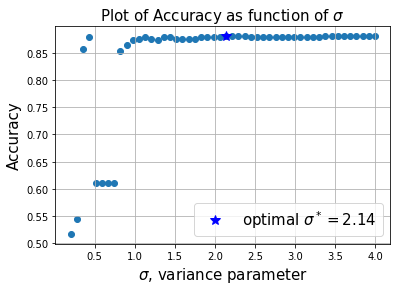

In [187]:
plt.scatter(sg_val,accuracy_sg_var)
plt.plot(sg_val[25],accuracy_sg_var[25],'b*',markersize=10)
plt.legend(['optimal $\sigma^* = $'+ str(round(sg_val[25],2))],fontsize=15)
plt.title('Plot of Accuracy as function of $\sigma$', Fontsize = 15 )
plt.ylabel('Accuracy', Fontsize = 15)
plt.xlabel('$\sigma$, variance parameter', Fontsize = 15)
plt.grid()

In [ ]:
print(V.shape)

(435, 435)


Text(0.5, 0.92, 'Unnormalized embedding')

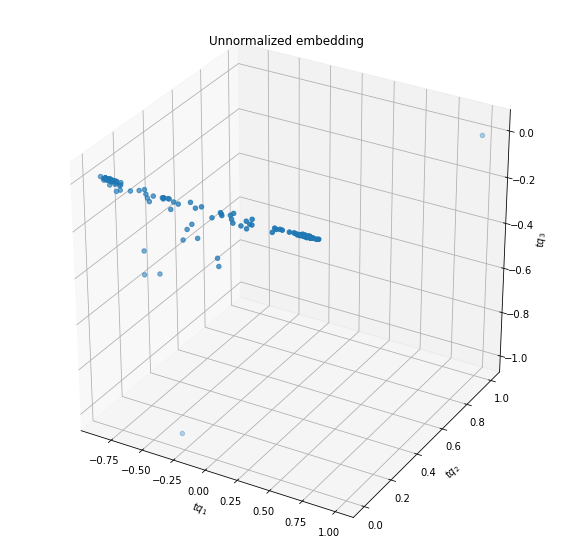

In [ ]:

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

ax.scatter( V[:,1]/np.abs(V[:,1]).max(), V[:,2]/np.abs(V[:,2]).max(), V[:,3]/np.abs(V[:,3]).max()  )
ax.set_xlabel('$tq_1$')
ax.set_ylabel('$tq_2$')
ax.set_zlabel('$tq_3$')
ax.set_title('Unnormalized embedding')

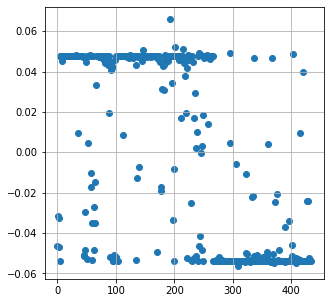

In [ ]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
ax.scatter(range(435),V[:,1])
plt.grid()

In [ ]:
predicted_label = np.array(np.sign(V[:,1]))

In [ ]:
print(predicted_label.shape)

(435,)


In [ ]:
misclassifed_n = 0
for i in range(435):
  if predicted_label[i] == y_data_party_order[i][0]:
    None
  else:
    misclassifed_n +=1

In [ ]:
accuracy_sig = 1 - misclassifed_n/435

In [ ]:
print(accuracy_sig)

0.8735632183908046


Semi-Supervised Learning

In [ ]:
from sklearn.linear_model import Ridge


Creating function for streamlining 

In [ ]:
def SSL(M,J,V):
  Y_known= y_data_modif_ori[0:J]
  V_ssl = V[0:J,0:M]

  # we don't really need regularization here since M is small compared to J
  SSLRidge = Ridge(alpha = 1e-8, fit_intercept=False) 

  SSLRidge.fit(V_ssl, Y_known)

  # predict labels on entire data set 
  beta_hat = SSLRidge.coef_

  Y_pred =  np.sign(np.dot(V[:,0:M], beta_hat.T))

  return Y_pred

In [ ]:
def SSLacc(M,J,V,ytrue):
  Y_predicted = SSL(M,J,V)
  accuracySSL = accuracy(Y_predicted,ytrue)
  return accuracySSL

In [161]:
optim_sigma= 1.21
M =[2,3,4,5,6] # number of eigenvectors used 
J = [5,10,20,40] # number of labelled set that will be shown to the model  

In [162]:
V = eigenvector(X_data_ori,optim_sigma)

M =2 with various J 

In [163]:
Y_pred25 = SSL(M[0],J[0],V)

In [164]:
accuracy_25 = accuracy(Y_pred25[:],y_data_modif_ori[:])
print(accuracy_25)

0.8735632183908046


In [165]:
Y_pred210 = SSL(M[0],J[1],V)
accuracy_210 = accuracy(Y_pred210,y_data_modif_ori)
print(accuracy_210)

0.8735632183908046


In [166]:
Y_pred220 = SSL(M[0],J[2],V)
accuracy_220 = accuracy(Y_pred220,y_data_modif_ori)
print(accuracy_220)

0.8781609195402299


In [167]:
Y_pred240 = SSL(M[0],J[3],V)
accuracy_240 = accuracy(Y_pred240,y_data_modif_ori)
print(accuracy_240)

0.8758620689655172


M=3 with various J

In [168]:
Y_pred35 = SSL(M[1],J[0],V)
accuracy35 = accuracy(Y_pred35,y_data_modif_ori)
print(accuracy35)

0.8988505747126436


In [169]:
Y_pred310 = SSL(M[1],J[1],V)
accuracy310 = accuracy(Y_pred310,y_data_modif_ori)
print(accuracy310)

0.8666666666666667


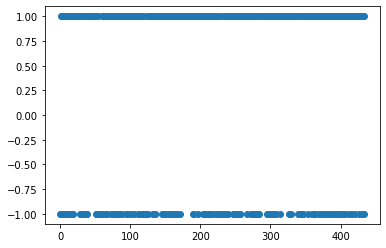

In [170]:
plt.scatter(np.arange(435),Y_pred310)

In [171]:
Y_pred320 = SSL(M[1],J[2],V)
accuracy320 = accuracy(Y_pred320,y_data_modif_ori)
print(accuracy320)

0.8781609195402299


In [172]:
Y_pred340 = SSL(M[1],J[3],V)
accuracy340 = accuracy(Y_pred340,y_data_modif_ori)
print(accuracy340)

0.8758620689655172


M=4 with various J

In [173]:
Y_pred45 = SSL(M[2],J[0],V)
accuracy45 = accuracy(Y_pred45,y_data_modif_ori)
print(accuracy45)

0.39770114942528734


In [174]:
Y_pred410 = SSL(M[2],J[1],V)
accuracy410 = accuracy(Y_pred410,y_data_modif_ori)
print(accuracy410)

0.9195402298850575


In [175]:
Y_pred420 = SSL(M[2],J[2],V)
accuracy420 = accuracy(Y_pred420,y_data_modif_ori)
print(accuracy420)

0.8988505747126436


In [176]:
Y_pred440 = SSL(M[2],J[3],V)
accuracy440 = accuracy(Y_pred440,y_data_modif_ori)
print(accuracy440)

0.8919540229885058


M = 5 with various J

In [177]:
Y_pred55 = SSL(M[3],J[0],V)
accuracy55 = accuracy(Y_pred55,y_data_modif_ori)
print(accuracy55)

0.4137931034482759


In [178]:
Y_pred510 = SSL(M[3],J[1],V)
accuracy510 = accuracy(Y_pred510,y_data_modif_ori)
print(accuracy510)

0.7839080459770115


In [179]:
Y_pred520 = SSL(M[3],J[2],V)
accuracy520 = accuracy(Y_pred520,y_data_modif_ori)
print(accuracy520)

0.8505747126436781


In [180]:
Y_pred540 = SSL(M[3],J[3],V)
accuracy540 = accuracy(Y_pred540,y_data_modif_ori)
print(accuracy540)

0.8620689655172413


M = 6 with various J 

In [181]:
Y_pred65 = SSL(M[4],J[0],V)
accuracy65 = accuracy(Y_pred65,y_data_modif_ori)
print(accuracy65)

0.8666666666666667


In [182]:
Y_pred610 = SSL(M[4],J[1],V)
accuracy610 = accuracy(Y_pred610,y_data_modif_ori)
print(accuracy610)

0.8137931034482758


In [183]:
Y_pred620 = SSL(M[4],J[2],V)
accuracy620 = accuracy(Y_pred620,y_data_modif_ori)
print(accuracy620)

0.8942528735632184


In [184]:
Y_pred640 = SSL(M[4],J[3],V)
accuracy640 = accuracy(Y_pred640,y_data_modif_ori)
print(accuracy640)

0.864367816091954


In [188]:
accuracy_SSL_mj = np.zeros((5,4))
for i in np.arange(5):
  for j in np.arange(4):
    #Y_pred_mj = SSL(M[i],J[j],V)
    #accuracy_SSL_mj[i][j] =  accuracy(Y_pred_mj,y_data_modif_ori)
    accuracy_SSL_mj[i][j] =  SSLacc(M[i],J[j],V,y_data_modif_ori)
print(np.round(accuracy_SSL_mj.T,3))

[[0.874 0.899 0.398 0.414 0.867]
 [0.874 0.867 0.92  0.784 0.814]
 [0.878 0.878 0.899 0.851 0.894]
 [0.876 0.876 0.892 0.862 0.864]]


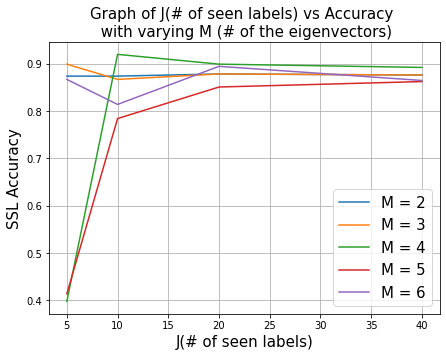

In [186]:
plt.figure(figsize=(7,5))
for i in np.arange(np.size(M)):
  plt.plot(J, accuracy_SSL_mj[i,:], label = 'M = '+str(M[i]))

plt.legend(fontsize=15)
plt.xlabel('J(# of seen labels)',Fontsize=15)
plt.ylabel('SSL Accuracy',Fontsize=15)
plt.grid()
plt.title('Graph of J(# of seen labels) vs Accuracy \n with varying M (# of the eigenvectors)',Fontsize=15)
plt.show()